In [1]:
# print(fbfkjb)
import pandas as pd
import numpy as np
import nltk 
import re
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics
import sklearn
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import string

In [2]:
# from spellchecker import SpellChecker
#import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
#nltk.download("stopwords")

stop_words = stopwords.words("english")

#############################
### Get Data ##

# train= pd.read_csv('train.csv')
# test=pd.read_csv('test.csv')
# # concat all
# df=pd.concat([train,test])


# spell = SpellChecker()
# def correct_spellings(x, spell=spell):
#     """correct the missplled words of a given tweet"""
#     x = x.split()
#     misspelled = spell.unknown(x)
#     result = map(lambda word : spell.correction(word) if word in  misspelled else word, x)
#     return " ".join(result)

def tweets_cleaning(x, correct_spelling=False, remove_emojis=True, remove_stop_words=True):
    """Apply function to a clean a tweet"""
    x = x.lower().strip()
    # romove urls
    url = re.compile(r'https?://\S+|www\.\S+')
    x = url.sub(r'',x)
    # remove html tags
    html = re.compile(r'<.*?>')
    x = html.sub(r'',x)
    # remove punctuation
    operator = str.maketrans('','',string.punctuation) #????
    x = x.translate(operator)
    if correct_spelling:
        x = correct_spellings(x)
    if remove_emojis:
        x = x.encode('ascii', 'ignore').decode('utf8').strip()
    if remove_stop_words:
        x = ' '.join([word for word in x.split(' ') if word not in stop_words])
    return x




In [3]:

# x_train=pd.read_csv("TEXT_X_train.csv")
# x_test=pd.read_csv("TEXT_X_test.csv")


y_train=pd.read_csv("TEXTlabel_train.csv")
y_test =pd.read_csv("TEXTlabel_test .csv") 

# x_train.shape

# # X_test=X_test.drop('Unnamed: 0',axis=1)
# y_train=pd.read_csv("TEXTlabel_train.csv")
# y_train.shape

In [4]:
# x_test=x_test.drop('Unnamed: 0',axis=1)
# x_train=x_train.drop('Unnamed: 0',axis=1)
y_test=y_test.drop('Unnamed: 0',axis=1)
y_train=y_train.drop('Unnamed: 0',axis=1)

In [5]:
x_cv=pd.read_csv("TEXT_X_V.csv")
y_cv=pd.read_csv("TEXTlabel_V.csv")
x_cv=x_cv.drop('Unnamed: 0',axis=1)
y_cv=y_cv.drop('Unnamed: 0',axis=1)

In [6]:
# y_cv.shape

In [7]:
from nltk.tokenize import word_tokenize
import gensim
import string
from keras.preprocessing.text import Tokenizer

In [9]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

In [10]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=(512,)))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model

In [11]:
import joblib

# joblib.dump(DTmodel, 'DTgrid_NLP.pkl')

In [37]:
df=pd.read_csv("news_articles.csv")

In [40]:
1294/2095

0.6176610978520286

In [39]:
df['label'].value_counts()

Fake    1294
Real     801
Name: label, dtype: int64

In [12]:
from sklearn import metrics

In [13]:
# from tempfile import TemporaryFile

# outfile = TemporaryFile()
xtrain_tfidf_ngram=np.load("xtrain_tfidf_ngram.npy")

In [14]:
# _ = outfile.seek(0) # Only needed here to simulate closing & reopening file

# np.load(outfile)
xvalid_tfidf_ngram=np.load("xvalid_tfidf_ngram.npy")

In [15]:
tfidf_vector_X = xtrain_tfidf_ngram  #//shape - (3,6)
tfidf_vector_valid= xvalid_tfidf_ngram
# None] #//shape - (3,6,1) 
# tfidf_vector_valid = tfidf_vector_valid[:, :, None] #//shape - (3,6,1)


In [16]:
tfidf_vector_X.shape[1:]

(512,)

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

In [20]:
# input_shape= [x_train.shape[1]]

# NNmodel = create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1,learning_rate=0.01)

# # Create model
# model = keras.Sequential([
#     layers.Dense(256, activation='relu', input_shape=tfidf_vector_X.shape[1:]),
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
    
#     layers.Dense(256, activation='relu'),    
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
    
#     layers.Dense(1, activation='sigmoid'),
# ])

# opt = keras.optimizers.Adam(learning_rate=0.01)

# model.compile(
#     optimizer=opt,
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy'],
    
# )
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
model =  KerasClassifier(build_fn=create_model, verbose = False)  

In [21]:
param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

In [22]:
gridNN = GridSearchCV(estimator = model, param_grid = param_grid)

In [28]:
model.get_params()

{'verbose': False,
 'build_fn': <function __main__.create_model(hidden_layers, learning_rate)>}

In [29]:
history = gridNN.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)

In [30]:
history.best_params_

{'hidden_layers': 4, 'learning_rate': 0.01}

In [31]:
print(history.best_score_)
# print(grid.best_params_)

0.6340700149536133


In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

AttributeError: 'GridSearchCV' object has no attribute 'history'

In [35]:
predictions = gridNN.predict(xvalid_tfidf_ngram)

# Plotting
cm = metrics.confusion_matrix(y_cv, predictions)
# plt.figure(figsize=(9,9))
# sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r');
# plt.ylabel('Actual label');
# plt.xlabel('Predicted label');
# all_sample_title = 'Accuracy Score: {0}%'.format(round(history_df['accuracy'].iloc[-1]*100,1))
# plt.title(all_sample_title, size = 15);

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [45]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train, gridNN.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, gridNN.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, gridNN.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, gridNN.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Accuracy_Score: 62.184189079054605 %
Training Recall: 0.0 %
Training precision_score: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training F1 Score: 0.0 %


In [36]:

# print('Confusion matrix: \n', cm)
print('TP: ', cm[1,1])
print('TN: ', cm[0,0])
print('FP: ', cm[0,1])
print('FN: ', cm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score Test:',metrics.accuracy_score(y_test, gridNN.predict(xvalid_tfidf_ngram))*100,'%')


TP:  0
TN:  265
FP:  0
FN:  144
Accuracy_Score Test: 64.30317848410758 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [37]:
print('precision_score:',metrics.precision_score(y_cv, gridNN.predict(xvalid_tfidf_ngram))*100,'%')

print('recall_score:',metrics.recall_score(y_cv, gridNN.predict(xvalid_tfidf_ngram))*100,'%')

precision_score: 0.0 %
recall_score: 0.0 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/pytho

In [18]:
def create_modelWithDropBatch(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=(512,)))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.BatchNormalization())
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(8, activation='relu'))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model



In [ ]:
def create_model(  hidden_layers,learning_rate):
  # Initialize the constructor
    model =  keras.Sequential()
      # Add an input layer
    activation='sigmoid'
    model.add(layers.Dense(256, activation=activation, input_shape=(512,)))
    for i in range(hidden_layers):
          # Add one hidden layer
        model.add(layers.Dense(8, activation=activation))

      # Add an output layer 
    model.add(layers.Dense(1, activation=activation))
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
      #compile model
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=
      ['accuracy'])

    return model

In [24]:
import time

In [25]:
#
model_Batch_drop_relu =  KerasClassifier(build_fn=create_modelWithDropBatch, verbose = False)  

param_grid={'learning_rate':[0.1,0.001,0.01,0.05,0.05,0.5],'hidden_layers':[2,4,6,8,10]}

gridNN_Batch_drop_relu = GridSearchCV(estimator = model_Batch_drop_relu, param_grid = param_grid)

model_Batch_drop_relu.get_params()
# starting time
start = time.time()
# df_run_stats_ga, df_run_curves_ga = ga.run()
# sleeping for 1 sec to get 10 sec runtime

history_Batch_drop_relu = gridNN_Batch_drop_relu.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)
time.sleep(1)

# program body ends

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")
history_Batch_drop_relu.best_params_

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)

{'verbose': False,
 'build_fn': <function __main__.create_modelWithDropBatch(hidden_layers, learning_rate)>}

Runtime of the program is 2006.8955833911896


{'hidden_layers': 4, 'learning_rate': 0.1}

0.6585266351699829


In [58]:
y_pred_SVM1 = gridNN_Batch_drop_relu.predict(xvalid_tfidf_ngram)
y_pred_SVM1

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<Figure size 576x432 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Confusion_matrix')

Text(0.5, 33.0, 'Predicted Class')

Text(51.0, 0.5, 'Actual class')

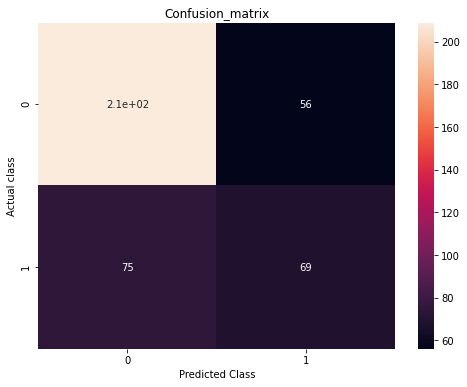

Confusion matrix: 
 [[209  56]
 [ 75  69]]
TP:  69
TN:  209
FP:  56
FN:  75
TP:  69
TN:  209
FP:  56
FN:  75
Accuracy_Score: 67.97066014669927 %
precision_score: 55.2 %
recall_score: 47.91666666666667 %


In [27]:
y_pred_SVM = gridNN_Batch_drop_relu.predict(xvalid_tfidf_ngram)

conf_mat_svm = metrics.confusion_matrix(y_cv['label'], y_pred_SVM)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat_svm,annot=True)
plt.title("Confusion_matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Actual class")
plt.show()
print('Confusion matrix: \n', conf_mat_svm)
print('TP: ', conf_mat_svm[1,1])
print('TN: ', conf_mat_svm[0,0])
print('FP: ', conf_mat_svm[0,1])
print('FN: ', conf_mat_svm[1,0])


# print('Confusion matrix: \n', cm)
print('TP: ', conf_mat_svm[1,1])
print('TN: ', conf_mat_svm[0,0])
print('FP: ', conf_mat_svm[0,1])
print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], y_pred_SVM)*100,'%')

In [28]:
print('Training Accuracy_Score:',metrics.accuracy_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training Accuracy_Score: 82.72208638956805 %
Training Recall: 81.03448275862068 %
Training precision_score: 75.2 %
Training F1 Score: 78.00829875518671 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [29]:
bestNN=create_modelWithDropBatch(hidden_layers= 2, learning_rate= 0.05)
history2 = bestNN.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=200,
#     callbacks=[early_stopping],
)


Epoch 1/200
3/3 [==============================] - 1s 104ms/step - loss: 0.9062 - accuracy: 0.4780 - val_loss: 0.6448 - val_accuracy: 0.6479
Epoch 2/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6752 - accuracy: 0.6098 - val_loss: 0.6244 - val_accuracy: 0.6479
Epoch 3/200
3/3 [==============================] - 0s 26ms/step - loss: 0.6755 - accuracy: 0.6229 - val_loss: 0.6286 - val_accuracy: 0.6479
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6341 - accuracy: 0.6231 - val_loss: 0.6345 - val_accuracy: 0.6479
Epoch 5/200
3/3 [==============================] - 0s 27ms/step - loss: 0.6321 - accuracy: 0.6237 - val_loss: 0.6351 - val_accuracy: 0.6479
Epoch 6/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6244 - accuracy: 0.6215 - val_loss: 0.6419 - val_accuracy: 0.6479
Epoch 7/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6187 - accuracy: 0.6328 - val_loss: 0.6466 - val_accuracy: 0.6479
Epoch 8/200
3/3 [==

3/3 [==============================] - 0s 22ms/step - loss: 0.3132 - accuracy: 0.8448 - val_loss: 0.9130 - val_accuracy: 0.6846
Epoch 60/200
3/3 [==============================] - 0s 23ms/step - loss: 0.3051 - accuracy: 0.8483 - val_loss: 1.0681 - val_accuracy: 0.6724
Epoch 61/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2956 - accuracy: 0.8590 - val_loss: 0.9800 - val_accuracy: 0.6601
Epoch 62/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2961 - accuracy: 0.8572 - val_loss: 0.9044 - val_accuracy: 0.6748
Epoch 63/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2874 - accuracy: 0.8460 - val_loss: 1.0156 - val_accuracy: 0.6797
Epoch 64/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2742 - accuracy: 0.8633 - val_loss: 1.0573 - val_accuracy: 0.6919
Epoch 65/200
3/3 [==============================] - 0s 22ms/step - loss: 0.3014 - accuracy: 0.8502 - val_loss: 1.0104 - val_accuracy: 0.6748
Epoch 66/200
3/3 [========

Epoch 117/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2005 - accuracy: 0.9099 - val_loss: 1.3432 - val_accuracy: 0.7115
Epoch 118/200
3/3 [==============================] - 0s 22ms/step - loss: 0.2132 - accuracy: 0.9036 - val_loss: 1.3809 - val_accuracy: 0.7237
Epoch 119/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1997 - accuracy: 0.9107 - val_loss: 1.3727 - val_accuracy: 0.7139
Epoch 120/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1818 - accuracy: 0.9144 - val_loss: 1.4686 - val_accuracy: 0.7042
Epoch 121/200
3/3 [==============================] - 0s 22ms/step - loss: 0.1984 - accuracy: 0.9064 - val_loss: 1.5146 - val_accuracy: 0.7115
Epoch 122/200
3/3 [==============================] - 0s 23ms/step - loss: 0.2129 - accuracy: 0.9090 - val_loss: 1.5381 - val_accuracy: 0.7090
Epoch 123/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1893 - accuracy: 0.9103 - val_loss: 1.5144 - val_accuracy: 0.7066
Epoch 

Epoch 175/200
3/3 [==============================] - 0s 23ms/step - loss: 0.1640 - accuracy: 0.9241 - val_loss: 1.9944 - val_accuracy: 0.6797
Epoch 176/200
3/3 [==============================] - 0s 22ms/step - loss: 0.1659 - accuracy: 0.9287 - val_loss: 1.9305 - val_accuracy: 0.7042
Epoch 177/200
3/3 [==============================] - 0s 21ms/step - loss: 0.1657 - accuracy: 0.9195 - val_loss: 1.9152 - val_accuracy: 0.7164
Epoch 178/200
3/3 [==============================] - 0s 22ms/step - loss: 0.1676 - accuracy: 0.9264 - val_loss: 1.8104 - val_accuracy: 0.7042
Epoch 179/200
3/3 [==============================] - 0s 22ms/step - loss: 0.1540 - accuracy: 0.9361 - val_loss: 1.7382 - val_accuracy: 0.6797
Epoch 180/200
3/3 [==============================] - 0s 22ms/step - loss: 0.1788 - accuracy: 0.9261 - val_loss: 1.5961 - val_accuracy: 0.6944
Epoch 181/200
3/3 [==============================] - 0s 22ms/step - loss: 0.1546 - accuracy: 0.9328 - val_loss: 1.7495 - val_accuracy: 0.7090
Epoch 

In [ ]:
10secnds

In [ ]:
da

<AxesSubplot:title={'center':'Cross-entropy'}>

<AxesSubplot:title={'center':'Accuracy'}>

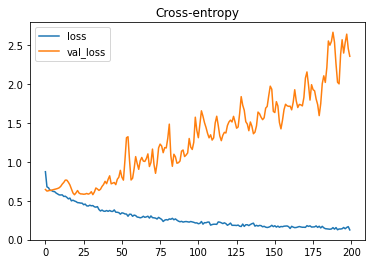

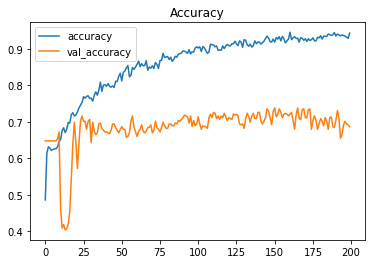

In [31]:
history_df = pd.DataFrame(history2.history)
history_df.to_csv("BackProphistory_df.csv")
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [32]:

start = time.time()

time.sleep(1)

# program body ends
bestNN=create_modelWithDropBatch(hidden_layers= 2, learning_rate= 0.05)
history1000 = bestNN.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=1000,
#     callbacks=[early_stopping],
)

# end time
end = time.time()

# total time taken
print(f"Runtime of the program is {end - start}")
history_Batch_drop_relu.best_params_

print(history_Batch_drop_relu.best_score_)
# print(grid.best_params_)


Epoch 1/1000
3/3 [==============================] - 1s 107ms/step - loss: 0.7145 - accuracy: 0.5470 - val_loss: 0.6554 - val_accuracy: 0.6479
Epoch 2/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.7006 - accuracy: 0.6120 - val_loss: 0.6582 - val_accuracy: 0.6406
Epoch 3/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.6362 - accuracy: 0.6198 - val_loss: 0.6631 - val_accuracy: 0.6479
Epoch 4/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6404 - accuracy: 0.6319 - val_loss: 0.6482 - val_accuracy: 0.6479
Epoch 5/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.6309 - accuracy: 0.6189 - val_loss: 0.6311 - val_accuracy: 0.6479
Epoch 6/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.6159 - accuracy: 0.6358 - val_loss: 0.6147 - val_accuracy: 0.6675
Epoch 7/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.5995 - accuracy: 0.6496 - val_loss: 0.5951 - val_accuracy: 0.6822
Epoch 8/1000

Epoch 59/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.2987 - accuracy: 0.8634 - val_loss: 1.1722 - val_accuracy: 0.6553
Epoch 60/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.2998 - accuracy: 0.8420 - val_loss: 1.0104 - val_accuracy: 0.6650
Epoch 61/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.2974 - accuracy: 0.8419 - val_loss: 1.0795 - val_accuracy: 0.6748
Epoch 62/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.2902 - accuracy: 0.8631 - val_loss: 1.2551 - val_accuracy: 0.6724
Epoch 63/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.2892 - accuracy: 0.8624 - val_loss: 1.5190 - val_accuracy: 0.6504
Epoch 64/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.3010 - accuracy: 0.8436 - val_loss: 1.5262 - val_accuracy: 0.6455
Epoch 65/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.2749 - accuracy: 0.8585 - val_loss: 1.4223 - val_accuracy: 0.6601
Epoch 

3/3 [==============================] - 0s 21ms/step - loss: 0.1918 - accuracy: 0.9092 - val_loss: 1.7056 - val_accuracy: 0.6944
Epoch 117/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1900 - accuracy: 0.9094 - val_loss: 1.8155 - val_accuracy: 0.6870
Epoch 118/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.1568 - accuracy: 0.9265 - val_loss: 1.6591 - val_accuracy: 0.6895
Epoch 119/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.1759 - accuracy: 0.9129 - val_loss: 1.4171 - val_accuracy: 0.6993
Epoch 120/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.1709 - accuracy: 0.9089 - val_loss: 1.4206 - val_accuracy: 0.6944
Epoch 121/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.1708 - accuracy: 0.9054 - val_loss: 1.5697 - val_accuracy: 0.7139
Epoch 122/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.1655 - accuracy: 0.9119 - val_loss: 1.7777 - val_accuracy: 0.6870
Epoch 123/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.1344 - accuracy: 0.9316 - val_loss: 2.8614 - val_accuracy: 0.6846
Epoch 174/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.1387 - accuracy: 0.9455 - val_loss: 2.5088 - val_accuracy: 0.6846
Epoch 175/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.1243 - accuracy: 0.9393 - val_loss: 2.0555 - val_accuracy: 0.6675
Epoch 176/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1549 - accuracy: 0.9334 - val_loss: 1.9629 - val_accuracy: 0.6724
Epoch 177/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1346 - accuracy: 0.9256 - val_loss: 2.1383 - val_accuracy: 0.6822
Epoch 178/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.1496 - accuracy: 0.9340 - val_loss: 2.1088 - val_accuracy: 0.6797
Epoch 179/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.1243 - accuracy: 0.9359 - val_loss: 2.0199 - val_accuracy: 0.6773
Epoch 180/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.1051 - accuracy: 0.9542 - val_loss: 2.6696 - val_accuracy: 0.6895
Epoch 231/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0953 - accuracy: 0.9506 - val_loss: 2.7433 - val_accuracy: 0.6870
Epoch 232/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.1100 - accuracy: 0.9465 - val_loss: 2.7177 - val_accuracy: 0.7042
Epoch 233/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0954 - accuracy: 0.9543 - val_loss: 2.6839 - val_accuracy: 0.7042
Epoch 234/1000
3/3 [==============================] - 0s 27ms/step - loss: 0.0807 - accuracy: 0.9712 - val_loss: 2.8502 - val_accuracy: 0.6968
Epoch 235/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0945 - accuracy: 0.9611 - val_loss: 3.1677 - val_accuracy: 0.6846
Epoch 236/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.1174 - accuracy: 0.9531 - val_loss: 3.1282 - val_accuracy: 0.6870
Epoch 237/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.0850 - accuracy: 0.9684 - val_loss: 2.7634 - val_accuracy: 0.6993
Epoch 288/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0851 - accuracy: 0.9695 - val_loss: 2.7788 - val_accuracy: 0.6870
Epoch 289/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0861 - accuracy: 0.9668 - val_loss: 2.7367 - val_accuracy: 0.6870
Epoch 290/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0694 - accuracy: 0.9775 - val_loss: 2.6900 - val_accuracy: 0.6773
Epoch 291/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0789 - accuracy: 0.9625 - val_loss: 2.6681 - val_accuracy: 0.6822
Epoch 292/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0734 - accuracy: 0.9703 - val_loss: 2.7429 - val_accuracy: 0.6724
Epoch 293/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0809 - accuracy: 0.9652 - val_loss: 2.8023 - val_accuracy: 0.6724
Epoch 294/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0647 - accuracy: 0.9743 - val_loss: 3.2919 - val_accuracy: 0.6773
Epoch 345/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0635 - accuracy: 0.9774 - val_loss: 3.1990 - val_accuracy: 0.6822
Epoch 346/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0739 - accuracy: 0.9698 - val_loss: 2.9897 - val_accuracy: 0.6822
Epoch 347/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0689 - accuracy: 0.9689 - val_loss: 2.9383 - val_accuracy: 0.6870
Epoch 348/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0671 - accuracy: 0.9741 - val_loss: 2.9991 - val_accuracy: 0.6870
Epoch 349/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0525 - accuracy: 0.9818 - val_loss: 3.1357 - val_accuracy: 0.6895
Epoch 350/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0636 - accuracy: 0.9780 - val_loss: 3.2403 - val_accuracy: 0.6846
Epoch 351/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.0557 - accuracy: 0.9796 - val_loss: 3.8160 - val_accuracy: 0.6870
Epoch 402/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0832 - accuracy: 0.9627 - val_loss: 3.4431 - val_accuracy: 0.6870
Epoch 403/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0868 - accuracy: 0.9681 - val_loss: 2.8929 - val_accuracy: 0.6895
Epoch 404/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0694 - accuracy: 0.9758 - val_loss: 2.5075 - val_accuracy: 0.6870
Epoch 405/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0585 - accuracy: 0.9767 - val_loss: 2.3980 - val_accuracy: 0.6748
Epoch 406/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0882 - accuracy: 0.9552 - val_loss: 2.4818 - val_accuracy: 0.6822
Epoch 407/1000
3/3 [==============================] - 0s 83ms/step - loss: 0.0558 - accuracy: 0.9766 - val_loss: 2.7811 - val_accuracy: 0.6724
Epoch 408/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0545 - accuracy: 0.9765 - val_loss: 2.4907 - val_accuracy: 0.7017
Epoch 459/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0560 - accuracy: 0.9774 - val_loss: 2.4251 - val_accuracy: 0.6846
Epoch 460/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0474 - accuracy: 0.9816 - val_loss: 2.5649 - val_accuracy: 0.6846
Epoch 461/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 2.9843 - val_accuracy: 0.6870
Epoch 462/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0867 - accuracy: 0.9709 - val_loss: 3.1677 - val_accuracy: 0.6919
Epoch 463/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0535 - accuracy: 0.9818 - val_loss: 3.2175 - val_accuracy: 0.6870
Epoch 464/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0593 - accuracy: 0.9793 - val_loss: 3.0553 - val_accuracy: 0.6822
Epoch 465/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0352 - accuracy: 0.9861 - val_loss: 3.2393 - val_accuracy: 0.6748
Epoch 516/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0276 - accuracy: 0.9850 - val_loss: 3.3185 - val_accuracy: 0.6773
Epoch 517/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0360 - accuracy: 0.9883 - val_loss: 3.4859 - val_accuracy: 0.6822
Epoch 518/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0313 - accuracy: 0.9892 - val_loss: 3.6120 - val_accuracy: 0.6944
Epoch 519/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0439 - accuracy: 0.9796 - val_loss: 3.9660 - val_accuracy: 0.6968
Epoch 520/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0310 - accuracy: 0.9897 - val_loss: 4.2925 - val_accuracy: 0.7090
Epoch 521/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0570 - accuracy: 0.9782 - val_loss: 3.8735 - val_accuracy: 0.6822
Epoch 522/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0505 - accuracy: 0.9788 - val_loss: 3.1400 - val_accuracy: 0.7139
Epoch 573/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0547 - accuracy: 0.9760 - val_loss: 3.0574 - val_accuracy: 0.6895
Epoch 574/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0502 - accuracy: 0.9792 - val_loss: 3.0659 - val_accuracy: 0.6528
Epoch 575/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0585 - accuracy: 0.9761 - val_loss: 3.2155 - val_accuracy: 0.6650
Epoch 576/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0451 - accuracy: 0.9815 - val_loss: 3.1845 - val_accuracy: 0.6504
Epoch 577/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0449 - accuracy: 0.9825 - val_loss: 3.0890 - val_accuracy: 0.6846
Epoch 578/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0505 - accuracy: 0.9789 - val_loss: 3.2593 - val_accuracy: 0.6895
Epoch 579/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0470 - accuracy: 0.9821 - val_loss: 3.0510 - val_accuracy: 0.6870
Epoch 630/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0370 - accuracy: 0.9839 - val_loss: 2.9964 - val_accuracy: 0.6846
Epoch 631/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0356 - accuracy: 0.9869 - val_loss: 2.9093 - val_accuracy: 0.6846
Epoch 632/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0427 - accuracy: 0.9827 - val_loss: 3.0051 - val_accuracy: 0.6822
Epoch 633/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0451 - accuracy: 0.9811 - val_loss: 3.1523 - val_accuracy: 0.6797
Epoch 634/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0419 - accuracy: 0.9841 - val_loss: 3.3788 - val_accuracy: 0.6968
Epoch 635/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0269 - accuracy: 0.9869 - val_loss: 3.6119 - val_accuracy: 0.6944
Epoch 636/1000

3/3 [==============================] - 0s 25ms/step - loss: 0.0346 - accuracy: 0.9863 - val_loss: 2.8211 - val_accuracy: 0.6968
Epoch 687/1000
3/3 [==============================] - 0s 31ms/step - loss: 0.0428 - accuracy: 0.9865 - val_loss: 2.7611 - val_accuracy: 0.6993
Epoch 688/1000
3/3 [==============================] - 0s 28ms/step - loss: 0.0238 - accuracy: 0.9906 - val_loss: 2.8417 - val_accuracy: 0.6944
Epoch 689/1000
3/3 [==============================] - 0s 24ms/step - loss: 0.0473 - accuracy: 0.9865 - val_loss: 2.9088 - val_accuracy: 0.6895
Epoch 690/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0203 - accuracy: 0.9928 - val_loss: 3.0584 - val_accuracy: 0.6919
Epoch 691/1000
3/3 [==============================] - 0s 36ms/step - loss: 0.0288 - accuracy: 0.9878 - val_loss: 3.2663 - val_accuracy: 0.6944
Epoch 692/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0398 - accuracy: 0.9853 - val_loss: 3.4359 - val_accuracy: 0.6895
Epoch 693/1000

3/3 [==============================] - 0s 22ms/step - loss: 0.0284 - accuracy: 0.9906 - val_loss: 4.0067 - val_accuracy: 0.6870
Epoch 744/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 3.9798 - val_accuracy: 0.6919
Epoch 745/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0472 - accuracy: 0.9837 - val_loss: 3.6977 - val_accuracy: 0.6993
Epoch 746/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0444 - accuracy: 0.9843 - val_loss: 3.5629 - val_accuracy: 0.6919
Epoch 747/1000
3/3 [==============================] - 0s 81ms/step - loss: 0.0430 - accuracy: 0.9848 - val_loss: 3.4698 - val_accuracy: 0.7090
Epoch 748/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0251 - accuracy: 0.9900 - val_loss: 3.4908 - val_accuracy: 0.7090
Epoch 749/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.0330 - accuracy: 0.9860 - val_loss: 3.4239 - val_accuracy: 0.7042
Epoch 750/1000

3/3 [==============================] - 0s 37ms/step - loss: 0.0369 - accuracy: 0.9896 - val_loss: 3.0227 - val_accuracy: 0.7042
Epoch 801/1000
3/3 [==============================] - 0s 25ms/step - loss: 0.0338 - accuracy: 0.9895 - val_loss: 3.1323 - val_accuracy: 0.6944
Epoch 802/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0278 - accuracy: 0.9902 - val_loss: 3.1473 - val_accuracy: 0.6968
Epoch 803/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0361 - accuracy: 0.9854 - val_loss: 3.0772 - val_accuracy: 0.7066
Epoch 804/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0237 - accuracy: 0.9902 - val_loss: 3.1098 - val_accuracy: 0.7066
Epoch 805/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0194 - accuracy: 0.9939 - val_loss: 3.0762 - val_accuracy: 0.7042
Epoch 806/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0252 - accuracy: 0.9888 - val_loss: 2.9191 - val_accuracy: 0.7066
Epoch 807/1000

3/3 [==============================] - 0s 23ms/step - loss: 0.0266 - accuracy: 0.9895 - val_loss: 3.3431 - val_accuracy: 0.7066
Epoch 858/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0272 - accuracy: 0.9923 - val_loss: 3.1488 - val_accuracy: 0.6944
Epoch 859/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0224 - accuracy: 0.9889 - val_loss: 3.0326 - val_accuracy: 0.6919
Epoch 860/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 2.9887 - val_accuracy: 0.6919
Epoch 861/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0323 - accuracy: 0.9866 - val_loss: 2.9828 - val_accuracy: 0.6846
Epoch 862/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0203 - accuracy: 0.9941 - val_loss: 2.9460 - val_accuracy: 0.6748
Epoch 863/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0240 - accuracy: 0.9893 - val_loss: 3.0274 - val_accuracy: 0.6870
Epoch 864/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 3.8503 - val_accuracy: 0.7066
Epoch 915/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0163 - accuracy: 0.9943 - val_loss: 3.8191 - val_accuracy: 0.7066
Epoch 916/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0224 - accuracy: 0.9929 - val_loss: 3.6624 - val_accuracy: 0.6968
Epoch 917/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0282 - accuracy: 0.9904 - val_loss: 3.5586 - val_accuracy: 0.6870
Epoch 918/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0246 - accuracy: 0.9892 - val_loss: 3.4924 - val_accuracy: 0.6870
Epoch 919/1000
3/3 [==============================] - 0s 26ms/step - loss: 0.0159 - accuracy: 0.9935 - val_loss: 3.4073 - val_accuracy: 0.7066
Epoch 920/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0314 - accuracy: 0.9896 - val_loss: 3.3863 - val_accuracy: 0.7066
Epoch 921/1000

3/3 [==============================] - 0s 24ms/step - loss: 0.0233 - accuracy: 0.9894 - val_loss: 2.5717 - val_accuracy: 0.6968
Epoch 972/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0165 - accuracy: 0.9947 - val_loss: 2.7021 - val_accuracy: 0.6968
Epoch 973/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 2.8278 - val_accuracy: 0.6919
Epoch 974/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0143 - accuracy: 0.9970 - val_loss: 3.0837 - val_accuracy: 0.6895
Epoch 975/1000
3/3 [==============================] - 0s 23ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 3.0600 - val_accuracy: 0.6944
Epoch 976/1000
3/3 [==============================] - 0s 21ms/step - loss: 0.0182 - accuracy: 0.9907 - val_loss: 3.1097 - val_accuracy: 0.7042
Epoch 977/1000
3/3 [==============================] - 0s 22ms/step - loss: 0.0162 - accuracy: 0.9920 - val_loss: 3.2788 - val_accuracy: 0.6944
Epoch 978/1000

{'hidden_layers': 4, 'learning_rate': 0.1}

0.6585266351699829


In [35]:
history1000DF = pd.DataFrame(history1000.history)
history1000DF.to_csv("BackProphistory1000epochs_df.csv")

In [41]:
# y_pred_SVM = gridNN_Batch_drop_relu.predict(xvalid_tfidf_ngram)

# conf_mat_svm = metrics.confusion_matrix(y_cv['label'], y_pred_SVM)
# plt.figure(figsize=(8,6))
# sns.heatmap(conf_mat_svm,annot=True)
# plt.title("Confusion_matrix")
# plt.xlabel("Predicted Class")
# plt.ylabel("Actual class")
# plt.show()
# print('Confusion matrix: \n', conf_mat_svm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], y_pred_SVM)*100,'%')

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, gridNN_Batch_drop_relu.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


Accuracy_Score: 67.97066014669927 %
precision_score: 55.2 %
recall_score: 47.91666666666667 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Training Accuracy_Score: 82.72208638956805 %
Training Recall: 81.03448275862068 %
Training precision_score: 75.2 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Training F1 Score: 78.00829875518671 %


<AxesSubplot:title={'center':'Cross-entropy'}>

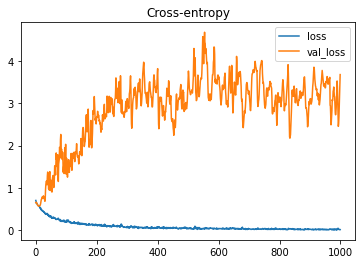

In [36]:
history1000DF.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")

In [73]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.0001,
    restore_best_weights=True,
)
# modelwithDropout = keras.Sequential([
#     layers.Dense(256, activation='relu', input_shape=input_shape),
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
    
#     layers.Dense(256, activation='relu'),    
#     layers.BatchNormalization(),
#     layers.Dropout(0.5),
    
#     layers.Dense(1, activation='sigmoid'),
# ])

# modelwithDropout.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['binary_accuracy'],
# )

bestNNearly=create_modelWithDropBatch(hidden_layers= 2, learning_rate= 0.05)
history3 = bestNNearly.fit(
     xtrain_tfidf_ngram, y_train,
    validation_data=(xvalid_tfidf_ngram,y_cv),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)


Epoch 1/200
3/3 [==============================] - 1s 102ms/step - loss: 0.7247 - accuracy: 0.5224 - val_loss: 0.6937 - val_accuracy: 0.6479
Epoch 2/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6416 - accuracy: 0.6241 - val_loss: 0.6442 - val_accuracy: 0.6479
Epoch 3/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6279 - accuracy: 0.6229 - val_loss: 0.6091 - val_accuracy: 0.6479
Epoch 4/200
3/3 [==============================] - 0s 23ms/step - loss: 0.6144 - accuracy: 0.6191 - val_loss: 0.6360 - val_accuracy: 0.6333
Epoch 5/200
3/3 [==============================] - 0s 24ms/step - loss: 0.6163 - accuracy: 0.6214 - val_loss: 0.6355 - val_accuracy: 0.6455
Epoch 6/200
3/3 [==============================] - 0s 22ms/step - loss: 0.6109 - accuracy: 0.6241 - val_loss: 0.6210 - val_accuracy: 0.6479
Epoch 7/200
3/3 [==============================] - 0s 24ms/step - loss: 0.5973 - accuracy: 0.6131 - val_loss: 0.6092 - val_accuracy: 0.6479
Epoch 8/200
3/3 [==

<AxesSubplot:title={'center':'Cross-entropy'}>

<AxesSubplot:title={'center':'Accuracy'}>

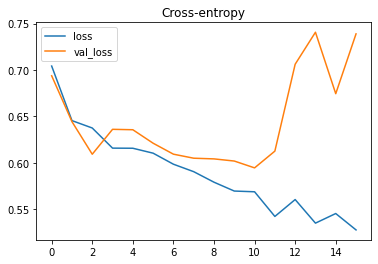

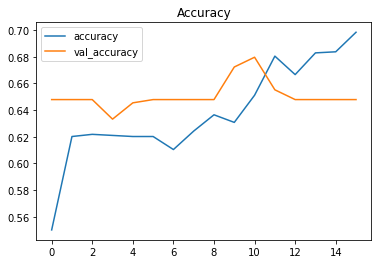

In [75]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

<AxesSubplot:title={'center':'Cross-entropy'}>

<AxesSubplot:title={'center':'Accuracy'}>

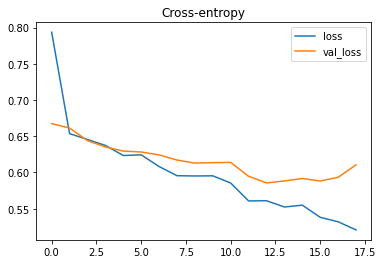

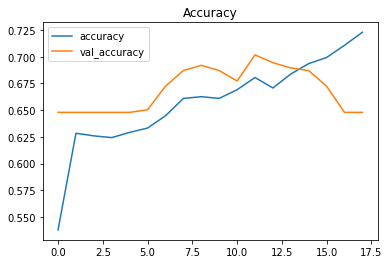

In [50]:
history_df = pd.DataFrame(history3.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")

In [ ]:
y_cv

In [59]:
y_pred_SVM

array([[0.41353747],
       [0.34362417],
       [0.47660562],
       [0.22995162],
       [0.21296689],
       [0.19385788],
       [0.41663736],
       [0.1985963 ],
       [0.48841858],
       [0.48649865],
       [0.41757494],
       [0.31103337],
       [0.4303911 ],
       [0.16950324],
       [0.27224004],
       [0.398345  ],
       [0.48848602],
       [0.46686375],
       [0.39566785],
       [0.5757847 ],
       [0.14449161],
       [0.49948817],
       [0.4891785 ],
       [0.4936868 ],
       [0.53590775],
       [0.21124128],
       [0.1921106 ],
       [0.17537072],
       [0.5335649 ],
       [0.08613992],
       [0.04206991],
       [0.2673775 ],
       [0.27738547],
       [0.40787625],
       [0.46325195],
       [0.53123486],
       [0.14152682],
       [0.27931678],
       [0.10808516],
       [0.29324764],
       [0.48032802],
       [0.4943213 ],
       [0.40526938],
       [0.47522414],
       [0.46262732],
       [0.4327659 ],
       [0.44762442],
       [0.176

In [56]:
y_cv

,label
0,0
1,1
2,0
3,0
4,0
...,...
404,0
405,0
406,0
407,0


In [61]:
bestNN.predict(xtrain_tfidf_ngram)

array([[1.5327334e-04],
       [9.1738880e-01],
       [9.9999923e-01],
       ...,
       [1.5739978e-08],
       [8.8838277e-08],
       [9.9999601e-01]], dtype=float32)

In [76]:
y_pred_SVM = bestNNearly.predict_classes(xvalid_tfidf_ngram)

# conf_mat_svm = metrics.confusion_matrix(y_cv['label'], y_pred_SVM)
# plt.figure(figsize=(8,6))
# sns.heatmap(conf_mat_svm,annot=True)
# plt.title("Confusion_matrix")
# plt.xlabel("Predicted Class")
# plt.ylabel("Actual class")
# plt.show()
# print('Confusion matrix: \n', conf_mat_svm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])



# print('Classification report: \n', metrics.classification_report(y_test, model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], y_pred_SVM)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], y_pred_SVM)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], y_pred_SVM)*100,'%')

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, bestNNearly.predict_classes(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, bestNNearly.predict_classes(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, bestNNearly.predict_classes(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, bestNNearly.predict_classes(xtrain_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

Accuracy_Score: 67.97066014669927 %
precision_score: 76.0 %
recall_score: 13.194444444444445 %
Training Accuracy_Score: 64.54767726161369 %
Training Recall: 10.991379310344827 %
Training precision_score: 69.86301369863014 %
Training F1 Score: 18.994413407821227 %


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

In [78]:
x_test=pd.read_csv("TEXT_X_test.csv")

# x_cv=pd.read_csv("TEXT_X_V.csv")
# y_cv=pd.read_csv("TEXTlabel_V.csv")
# y_train=pd.read_csv("TEXTlabel_train.csv")
y_test =pd.read_csv("TEXTlabel_test .csv") 

In [80]:
xtest_tfidf_ngram=np.load("xtest_tfidf_ngram.npy")

In [82]:
y_test

,Unnamed: 0,label
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
404,404,0
405,405,0
406,406,0
407,407,0


In [83]:
print('testing Accuracy_Score:',metrics.accuracy_score(y_test['label'], bestNNearly.predict_classes(xtest_tfidf_ngram))*100,'%')
print('testing Recall:',metrics.recall_score(y_test['label'], bestNNearly.predict_classes(xtest_tfidf_ngram))*100,'%')
print('testing precision_score:',metrics.precision_score(y_test['label'], bestNNearly.predict_classes(xtest_tfidf_ngram))*100,'%')
print('testing F1 Score:',metrics.f1_score(y_test['label'], bestNNearly.predict_classes(xtest_tfidf_ngram))*100,'%')


/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/home/dheekshitha-vibha/miniconda3/envs/myenv/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("i

testing Accuracy_Score: 62.8361858190709 %
testing Recall: 5.47945205479452 %
testing precision_score: 36.36363636363637 %
testing F1 Score: 9.523809523809524 %


In [44]:
# print(ahfhfkj)
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb= [0.3,0.4,0.5,0.6,0.7,0.8]

from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.1, n_estimators=50,booster='dart',
#                              subsample= 1.0,
              max_depth= 3, gamma= 0.5, 
#                      colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="subsample",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_xgb
plt.title("Validation Curve with XGB")
plt.xlabel("subsample")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:

from sklearn.model_selection import learning_curve

sizes, training_scores, testing_scores = learning_curve(SVC(C=10,gamma=0.1,kernel='rbf'),xtrain_tfidf_ngram, y_train['label'])

# Mean and Standard Deviation of training scores 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
  
# Mean and Standard Deviation of testing scores 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
  
# dotted blue line is for training scores and green line is for cross-validation score 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
  
# Drawing plot 
plt.title("LEARNING CURVE FOR SVM Classifier") 
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()




In contrast, for small amounts of data, the training score of the SVM is much greater than the validation score. Adding more training samples will most likely increase generalization.

    C: Inverse of the strength of regularization.

Behavior: As the value of ‘c’ increases the model gets overfits.

As the value of ‘c’ decreases the model underfits.

2. γ : Gamma (used only for RBF kernel)

Behavior: As the value of ‘ γ’ increases the model gets overfits.

As the value of ‘ γ’ decreases the model underfits.

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','linear','poly']}  

In [ ]:
np.arange(0.0001,0.1,0.01)

In [ ]:
test_scores_mean

The gamma parameter is not large but still the model is still overfitting. Hence we are going to tune C parameter

In [ ]:
parameter_svm = np.arange(0.0001,0.1,0.01)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=0.1,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="accuracy",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
parameter_svm = np.arange(0.0001,0.1,0.01)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=0.1,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="precision",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

The model is underfitting when the C value is reduced and overfitting when the values are not too high. From learning curve and validation curve results, it is clear that adding more data can only help increase the performance of the model

In [ ]:
 np.arange(0.001,0.1,0.01)

In [ ]:
parameter_svm = np.arange(0.001,0.1,0.01)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    SVC(gamma=0.1,kernel='rbf'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_svm,  scoring="accuracy",param_name="C",cv=5
)


train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range=parameter_svm
plt.title("Validation Curve with SVM varying C")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

gridKNN= {
    'n_neighbors':list(range(1,10,2)),
    'weights':['uniform','distance'],
    'metric':['euclidean','manhattan']
}

knn = GridSearchCV(
KNeighborsClassifier(),
gridKNN,
verbose=1,
cv=5)

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain_tfidf_ngram, y_train['label']) 

In [ ]:


joblib.dump(knn, 'KNN_gridsearch_NLP.pkl')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold



In [ ]:
knnModel=knn
knnModel.best_params_



In [ ]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_knn= [3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
    KNeighborsClassifier(metric= 'manhattan',weights= 'distance'), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_knn,  scoring="precision",param_name="n_neighbors",cv=5
)




In [ ]:
train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= [3,4,7,8,9,10,11,12,13,14,15,16,17,18,19]
plt.title("Validation Curve with KNN")
plt.xlabel("K")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [ ]:
y_cv

In [ ]:
knn_predictions1 = knnModel.best_estimator_.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knnModel.best_estimator_.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions1)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions1,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions1)*100,'%')



From the graph, it is evident that the model performs the best at K=3. However, we notice that training and precision is 99 whereas validation precision is 76. This is clear case of overfitting.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# gridKNN= {
#     'n_neighbors':list(range(1,10,2)),
#     'weights':['uniform','distance'],
#     'metric':['euclidean','manhattan']
# }

knn7 = KNeighborsClassifier(
n_neighbors=7,
    metric='euclidean', weights= 'distance')

# knn = KNeighborsClassifier(n_neighbors=2)
knn7.fit(xtrain_tfidf_ngram, y_train['label']) 



joblib.dump(knn7, 'KNN_gridsearch_NLP_K7.pkl')

In [ ]:
knn_predictions7 = knn7.predict(xvalid_tfidf_ngram)
# knn_predictions1 = np.round(knn_predictions1)
print('knnoost Test Set')
print('Accuracy: %.2f' % ((knn_predictions1 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, knn7.predict(xtrain_tfidf_ngram))*100,'%')


# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_cv['label'], model))
print('Accuracy_Score:',metrics.accuracy_score(y_cv['label'], knn_predictions7)*100,'%')


print('precision_score:',metrics.precision_score(y_cv['label'], knn_predictions7,)*100,'%')

print('recall_score:',metrics.recall_score(y_cv['label'], knn_predictions7)*100,'%')



# 6. Gradient Boosting 

In [ ]:
# XGBOOST

import xgboost as xgb


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
        }

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                            nthread=1, use_label_encoder=False, eval_metric='logloss')



folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 25)

search = RandomizedSearchCV(xgb_clf, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(x_train, y_train), random_state=25)

search.fit(xtrain_tfidf_ngram, y_train)

print('Best hyperparameters:')
print(search.best_params_)

joblib.dump(xgb_clf, 'xgb_gridsearchNLP.pkl')

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

params = {
        'min_child_weight': 1,
        'gamma': 2,
        'subsample': 1, #prevents overfitting
        'colsample_bytree': 0.8,
        'max_depth': 8,
        }

xgb_clf = xgb.XGBClassifier(learning_rate=0.3, n_estimators=600, objective='binary:logistic',
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])
# print('Best hyperparameters:')
# print(search.best_params_)

In [ ]:

# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictions = xgb_clf.predict(xvalid_tfidf_ngram)
xgb_predictions = np.round(xgb_predictions)
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictions)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictions)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictions)*100,'%')

In [ ]:

print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf.predict(xtrain_tfidf_ngram))*100,'%')

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_cv, xgb_predictions)
roc_auc = metrics.auc(fpr, tpr)
fprTrain, tprTrain, thresholdTrain = metrics.roc_curve(y_train, xgb_clf.predict(xtrain_tfidf_ngram))
roc_aucTrain = metrics.auc(fprTrain, tprTrain)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc,color="orange")
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fprTrain, tprTrain, 'b', label = 'AUC Train = %0.2f' % roc_aucTrain)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
# XGBOOST

import xgboost as xgb


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
    'n_estimators' : range(50, 400, 50)
        }

xgb_clf3 = xgb.XGBClassifier(learning_rate=0.3,  objective='binary:logistic',
                            nthread=1, use_label_encoder=False, eval_metric='logloss')



folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state = 25)

search2 = RandomizedSearchCV(xgb_clf3, param_distributions=params, n_iter=param_comb, scoring='precision', n_jobs=4, cv=skf.split(x_train, y_train), random_state=25)

search2.fit(xtrain_tfidf_ngram, y_train)

print('Best hyperparameters:')
print(search2.best_params_)

joblib.dump(xgb_clf3, 'xgb_gridsearchNLP_Precision_estimators.pkl')

In [ ]:
xgb_clf3.get_params

In [ ]:
https://stats.stackexchange.com/questions/443259/how-to-avoid-overfitting-in-xgboost-model

In [ ]:
# params={'subsample'= 1.0, 'n_estimators'= 50, 'min_child_weight'= 1, 'max_depth'= 5, 'gamma'= 0.5, 'colsample_bytree'= 1.0}

xgb_clf4 = xgb.XGBClassifier(learning_rate=0.3, 
                             subsample= 1.0, n_estimators= 50, min_child_weight= 1, max_depth= 5, gamma= 0.5, colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"])

xgb_clf4.fit(xtrain_tfidf_ngram, y_train,eval_set = [(xtrain_tfidf_ngram, y_train), (xvalid_tfidf_ngram, y_cv)])


In [ ]:

# # print('Confusion matrix: \n', cm)
# print('TP: ', conf_mat_svm[1,1])
# print('TN: ', conf_mat_svm[0,0])
# print('FP: ', conf_mat_svm[0,1])
# print('FN: ', conf_mat_svm[1,0])

# print('Classification report: \n', metrics.classification_report(y_test, model))
xgb_predictions4 = xgb_clf4.predict(xvalid_tfidf_ngram)
xgb_predictions4 = np.round(xgb_predictions4)
print('Accuracy_Score:',metrics.accuracy_score(y_cv, xgb_predictions4)*100,'%')


print('precision_score:',metrics.precision_score(y_cv, xgb_predictions4)*100,'%')

print('recall_score:',metrics.recall_score(y_cv, xgb_predictions4)*100,'%')

xgb_predictions4 = xgb_clf4.predict(xvalid_tfidf_ngram)
xgb_predictions4 = np.round(xgb_predictions4)
print('XGBoost Test Set')
print('Accuracy: %.2f' % ((xgb_predictions4 == y_cv['label']).mean()*100))

print('Training Accuracy_Score:',metrics.accuracy_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training Recall:',metrics.recall_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training precision_score:',metrics.precision_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')
print('Training F1 Score:',metrics.f1_score(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))*100,'%')

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_cv, xgb_predictions4)
roc_auc = metrics.auc(fpr, tpr)
fprTrain, tprTrain, thresholdTrain = metrics.roc_curve(y_train, xgb_clf4.predict(xtrain_tfidf_ngram))
roc_aucTrain = metrics.auc(fprTrain, tprTrain)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Test AUC = %0.2f' % roc_auc,color="orange")
# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fprTrain, tprTrain, 'b', label = 'AUC Train = %0.2f' % roc_aucTrain)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

In [ ]:
xgb_clf.get_params

Tuning parameter learning_rate and max_depth as the model is overfitting

In [ ]:
np.arange(0.1, 0.4, 0.1).tolist()

In [ ]:
# y_train_res=y_train_res_01.map({ 1:'Existing Customer',  0:'Attrited Customer'})

parameter_xgb=  range(50, 400, 50)
from sklearn.model_selection import validation_curve
#https://www.scikit-yb.org/en/latest/api/model_selection/validation_curve.html
training_scores,testing_scores = validation_curve(
   xgb.XGBClassifier(learning_rate=0.1, 
                             subsample= 1.0,  min_child_weight= 1, max_depth= 5, gamma= 0.5, colsample_bytree= 1.0,
                            
                            nthread=1, use_label_encoder=False, eval_metric=["error", "logloss"]), xtrain_tfidf_ngram, y_train['label'],
    param_range=parameter_xgb,  scoring="precision",param_name="n_estimators",cv=5
)




train_scores_mean = np.mean(training_scores, axis=1)
train_scores_std = np.std(training_scores, axis=1)
test_scores_mean = np.mean(testing_scores, axis=1)
test_scores_std = np.std(testing_scores, axis=1)
param_range= range(50, 400, 50)
plt.title("Validation Curve with XGB")
plt.xlabel("n_estimators")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
# lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()